# Mission 2.

### Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

**무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다 :**

1. 데이터를 톺아봅시다.  
  - 각 데이터는 어떤 자료형을 가지고 있나요?
  - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
  - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding (예를 들어 성별을 0, 1로 바꿔준다는 식)
2. 데이터에 대한 가설을 세워봅시다.  
  - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
  - 가설은 명확할 수록 좋습니다. ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다.
3. 가설을 검증하기 위한 증거를 찾아봅시다.  
  - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
  - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
  - `.merge()`를 통해서 두개 이상의 DataFrame을 합치면 어떨까요?
  - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

### 선정한 Dataset : Korea Income and Welfare (https://www.kaggle.com/hongsean/korea-income-and-welfare)

#### Content
There are 14 columns in data;

- id
- year : study conducted
- wave : from wave 1st in 2005 to wave 14th in 2018
- region: 1) Seoul 2) Kyeong-gi 3) Kyoung-nam 4) Kyoung-buk 5) Chung-nam 6) Gang-won &. Chung-buk 7) Jeolla & Jeju
- income: yearly income in M KRW(Million Korean Won. 1100 KRW = 1 USD)
- family_member: no. of family members
- gender: 1) male 2) female
- year_born
- education_level: 1) no education(under 7 yrs-old) 2) no education(7 & over 7 yrs-old) 3) elementary 4) middle school 5) high school 6) college 7) university degree 8) MA 9) doctoral degree
- marriage: marital status. 1) not applicable (under 18) 2) married 3) separated by death 4) separated 5) not married yet 6) others
- religion: 1) have religion 2) do not have
- occupation: this will be provided in separated code book
- company_size
- reasonnoneworker: 1) no capable 2) in military service 3) studying in school 4) prepare for school 5) prepare to apply job 6) house worker 7) caring kids at home 8) nursing 9) giving-up economic activities 10) no intention to work 11) others

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
income_df = pd.read_csv("./Korea Income and Welfare.csv")

In [4]:
income_df.head(10)

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.000000,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.000000,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.000000,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.000000,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.000000,1,2,1936,2,2,2,,,10
5,10101,2015,11,1,1171.000000,1,2,1936,2,2,1,,,10
6,10101,2016,12,1,1643.000000,1,2,1936,2,2,2,,,10
7,10101,2017,13,1,851.000000,1,2,1936,2,2,2,,,10
8,20101,2005,1,1,1257.000000,1,2,1945,4,2,2,421,1,
9,20101,2006,2,1,-520.062475,1,2,1945,4,2,2,,,8


In [5]:
income_df.dtypes

id                      int64
year                    int64
wave                    int64
region                  int64
income                float64
family_member           int64
gender                  int64
year_born               int64
education_level         int64
marriage                int64
religion                int64
occupation             object
company_size           object
reason_none_worker     object
dtype: object

In [6]:
income_df.isnull().sum()

id                    0
year                  0
wave                  0
region                0
income                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
dtype: int64

In [7]:
income_df.corr()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
id,1.000000,0.205198,0.205198,0.404668,-0.079724,-0.127126,0.068208,-0.106303,-0.171815,0.004237,0.004541
year,0.205198,1.000000,1.000000,0.052832,0.127865,-0.098519,0.067864,0.075994,0.012185,0.032196,0.013546
wave,0.205198,1.000000,1.000000,0.052832,0.127865,-0.098519,0.067864,0.075994,0.012185,0.032196,0.013546
region,0.404668,0.052832,0.052832,1.000000,-0.091743,-0.069322,0.042810,-0.108736,-0.159751,-0.035228,0.040886
income,-0.079724,0.127865,0.127865,-0.091743,1.000000,0.419934,-0.278735,0.356457,0.404105,-0.190925,0.031529
family_member,-0.127126,-0.098519,-0.098519,-0.069322,0.419934,1.000000,-0.493413,0.451990,0.418333,-0.443941,0.058729
gender,0.068208,0.067864,0.067864,0.042810,-0.278735,-0.493413,1.000000,-0.276731,-0.420304,0.402932,-0.138172
year_born,-0.106303,0.075994,0.075994,-0.108736,0.356457,0.451990,-0.276731,1.000000,0.639070,0.147027,0.146381
education_level,-0.171815,0.012185,0.012185,-0.159751,0.404105,0.418333,-0.420304,0.639070,1.000000,-0.044247,0.047513
marriage,0.004237,0.032196,0.032196,-0.035228,-0.190925,-0.443941,0.402932,0.147027,-0.044247,1.000000,0.033200


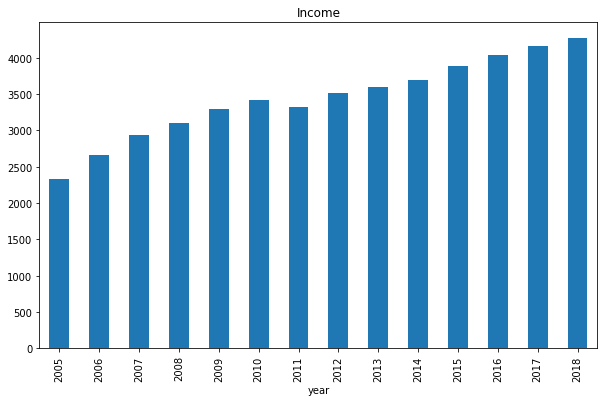

In [8]:
plt.figure(figsize=(10, 6))
income_df.groupby('year').mean()['income'].plot(kind='bar')
plt.title('Income')
plt.show()

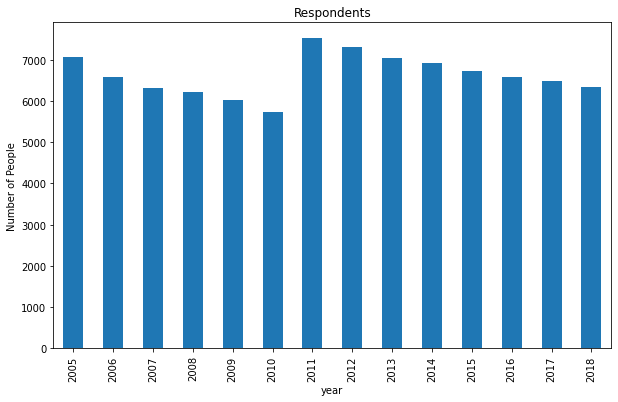

In [9]:
plt.figure(figsize=(10, 6))
income_df.groupby('year').count()['income'].plot(kind='bar')
plt.title('Respondents')
plt.ylabel('Number of People')
plt.show()

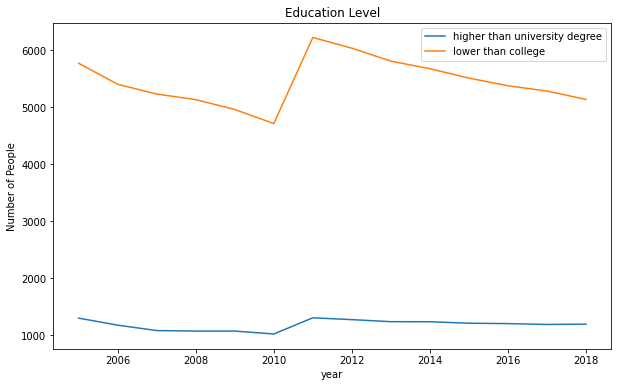

In [10]:
plt.figure(figsize=(10, 6))
income_df[income_df['education_level']>6].groupby('year').count()['id'].plot()
income_df[income_df['education_level']<=6].groupby('year').count()['id'].plot()
plt.legend(['higher than university degree', 'lower than college'])
plt.title('Education Level')
plt.ylabel('Number of People')
plt.show()


# income_df['year'][income_df['education_level']>6].plot(kind='bar')
# income_df['year'][income_df['education_level']<=6].plot(kind='bar')

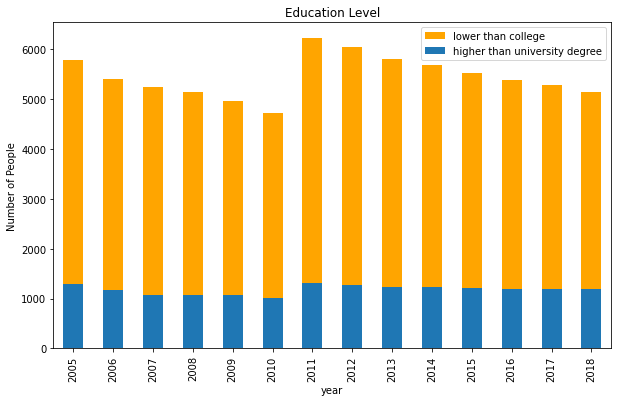

In [61]:
plt.figure(figsize=(10, 6))


income_df[income_df['education_level']<=6].groupby('year').count()['id'].plot(kind='bar', color='orange')
income_df[income_df['education_level']>6].groupby('year').count()['id'].plot(kind='bar')
plt.legend(['lower than college', 'higher than university degree'])
plt.title('Education Level')
plt.ylabel('Number of People')
plt.show()

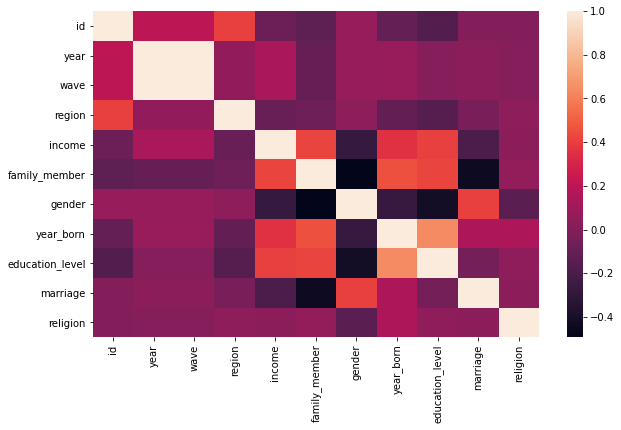

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(income_df.corr())
plt.show()

In [13]:
income_df['occupation'] = income_df['occupation'].astype(str)
income_df.dtypes

id                      int64
year                    int64
wave                    int64
region                  int64
income                float64
family_member           int64
gender                  int64
year_born               int64
education_level         int64
marriage                int64
religion                int64
occupation             object
company_size           object
reason_none_worker     object
dtype: object

In [14]:
income_df['occupation'].str.contains(' ')
income_df['occupation'] = income_df['occupation'].str.strip()
income_df.isnull().sum()

id                    0
year                  0
wave                  0
region                0
income                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
dtype: int64

In [15]:
'''
job 속성

0. 직업 없음
1. 관리자
2. 전문가 및 관련 종사자
3. 사무 종사자
4. 서비스 종사자
5. 판매 종사자
6. 농림어업 숙련 종사자
7. 기능원 및 관련 기능 종사자
8. 장치-기계 조작 및 조립 종사자
9. 단순노무 종사자
10. 군인
'''
def get_jobcode(x):
    if len(x) == 0:
        return 0
    elif len(x) > 3:
        return x[:2]
    else:
        return x[0]
#     if x[0] == 1:
#         if len(x) == 3:
#             return x[0]
#         else:
#             return x[:2]
#     else:
#         return x[0]

income_df['job'] = income_df['occupation'].apply(lambda x: get_jobcode(x))
income_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8,0
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10,0
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10,0
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1,0
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,,8
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,,8
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,,8
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,,8


<AxesSubplot:xlabel='job'>

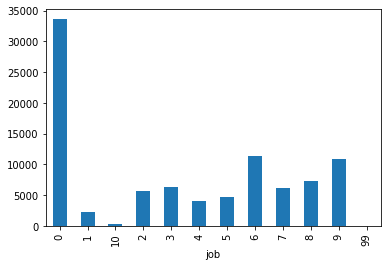

In [16]:
income_df.groupby('job').count()['id'].plot(kind='bar')

# 오 드디어! job column 완성

In [17]:
income_df.groupby('job').count()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
job,,,,,,,,,,,,,,
0,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643
1,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351
10,288,288,288,288,288,288,288,288,288,288,288,288,288,288
2,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638
3,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290
4,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023
5,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662
6,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413
7,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259


In [18]:
income_df[income_df['job'].astype(int)==99]

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
6464,6150101,2005,1,1,8700.0,3,1,1967,7,1,1,9999,7,,99
8760,8430101,2005,1,1,12100.0,3,1,1947,4,1,1,9999,1,,99
24267,22730101,2005,1,2,4035.0,4,1,1968,7,1,2,9999,10,,99
26186,24560101,2005,1,2,1499.0,2,1,1936,5,1,1,9999,11,,99
27452,25720101,2005,1,2,1262.0,2,1,1940,4,1,2,9999,11,,99
28519,26750101,2005,1,2,1049.0,2,1,1943,3,1,2,9999,1,,99
45820,42710101,2005,1,2,1592.0,2,1,1936,3,1,2,9999,1,,99
46932,43660101,2005,1,2,2530.0,3,2,1953,5,3,2,9999,2,,99
48360,44850101,2005,1,6,1216.0,4,1,1939,2,1,1,9999,11,,99
52935,48450101,2005,1,6,1440.0,3,1,1955,3,1,2,9999,11,,99


In [19]:
clean_df = income_df.drop(income_df[income_df['job'].astype(int)==99].index)
clean_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8,0
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10,0
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10,0
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1,0
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,,8
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,,8
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,,8
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,,8


In [20]:
clean_df['job'] = pd.to_numeric(clean_df['job'])
clean_df.groupby('job', sort=True).count()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
job,,,,,,,,,,,,,,
0,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643,33643
1,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351
2,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638,5638
3,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290,6290
4,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023
5,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662
6,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413,11413
7,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259,6259
8,7323,7323,7323,7323,7323,7323,7323,7323,7323,7323,7323,7323,7323,7323


<AxesSubplot:xlabel='job'>

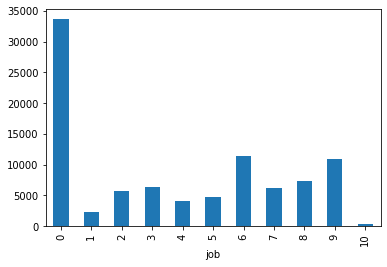

In [21]:
clean_df.groupby('job').count()['id'].plot(kind='bar')

In [22]:
clean_df['reason_none_worker'].str.contains(' ')
clean_df['reason_none_worker'] = clean_df['reason_none_worker'].str.strip()
clean_df['reason_none_worker'] = pd.to_numeric(clean_df['reason_none_worker'])
clean_df.isnull().sum()

id                        0
year                      0
wave                      0
region                    0
income                    0
family_member             0
gender                    0
year_born                 0
education_level           0
marriage                  0
religion                  0
occupation                0
company_size              0
reason_none_worker    60694
job                       0
dtype: int64

In [23]:
clean_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8.0,0
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10.0,0
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10.0,0
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1.0,0
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,NaN,8
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,NaN,8
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,NaN,8
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,NaN,8


In [24]:
clean_df['reason_none_worker'] = clean_df['reason_none_worker'].fillna(0)
clean_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8.0,0
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10.0,0
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10.0,0
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1.0,0
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,0.0,8
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,0.0,8
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,0.0,8
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,0.0,8


In [25]:
clean_df.groupby('reason_none_worker').count()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,job
reason_none_worker,,,,,,,,,,,,,,
0.0,60695,60695,60695,60695,60695,60695,60695,60695,60695,60695,60695,60695,60695,60695
1.0,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499
2.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3.0,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4.0,704,704,704,704,704,704,704,704,704,704,704,704,704,704
5.0,326,326,326,326,326,326,326,326,326,326,326,326,326,326
6.0,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074
7.0,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119
8.0,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275,4275


In [26]:
# 일도 안하고 왜 일 안하는지 이유도 없는 사람

clean_df[(clean_df['reason_none_worker']==0) & (clean_df['job']==0)]

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
32,30101,2015,11,1,1437.0,1,1,1948,3,2,2,,,0.0,0
93,100101,2005,1,1,430.0,2,2,1970,5,3,1,,,0.0,0
107,110101,2005,1,1,833.0,2,1,1937,4,1,1,,,0.0,0
126,140101,2005,1,1,494.0,2,1,1962,6,5,1,,,0.0,0
127,140101,2006,2,1,598.0,2,1,1962,6,5,1,,,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92535,97550701,2015,11,6,3701.0,4,1,1976,5,1,2,,,0.0,0
92556,97580701,2018,14,6,3196.0,2,1,1956,3,3,2,,,0.0,0
92689,97780701,2013,9,5,1428.0,1,1,1950,4,3,2,,,0.0,0
92745,97850801,2015,11,6,1443.0,1,2,1986,7,5,2,,,0.0,0


<AxesSubplot:xlabel='job'>

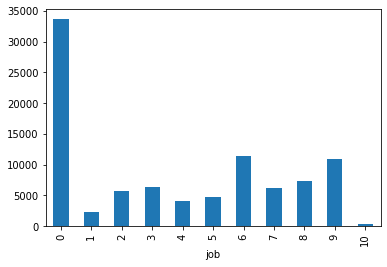

In [27]:
clean_df.groupby('job').count()['id'].plot(kind='bar')

In [28]:
clean_df[clean_df['job'] == 1].groupby('year').mean()['income']

year
2005     4844.613208
2006     5874.518770
2007     6261.892655
2008     7411.647541
2009     7929.764129
2010     7518.802578
2011     7214.094787
2012     8527.663158
2013     8163.509467
2014    10746.702512
2015     8557.453988
2016     9368.517857
2017    10706.659172
2018    10413.653846
Name: income, dtype: float64

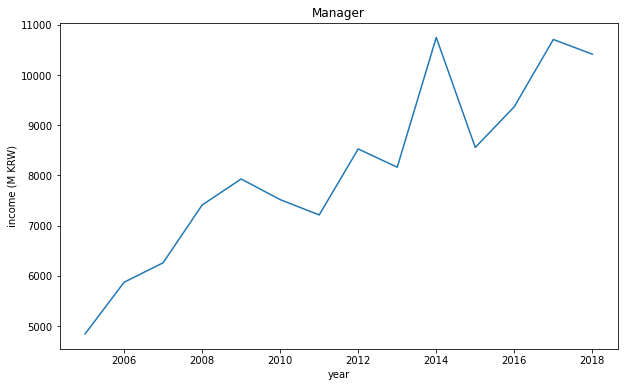

In [29]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 1].groupby('year').mean()['income'].plot()
plt.title('Manager')
plt.ylabel('income (M KRW)')
plt.show()

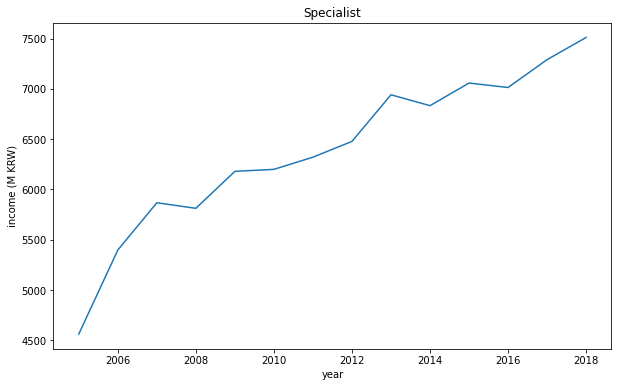

In [30]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 2].groupby('year').mean()['income'].plot()
plt.title('Specialist')
plt.ylabel('income (M KRW)')
plt.show()

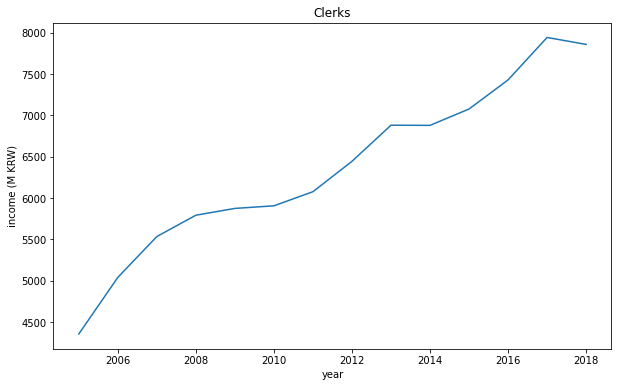

In [31]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 3].groupby('year').mean()['income'].plot()
plt.title('Clerks')
plt.ylabel('income (M KRW)')
plt.show()

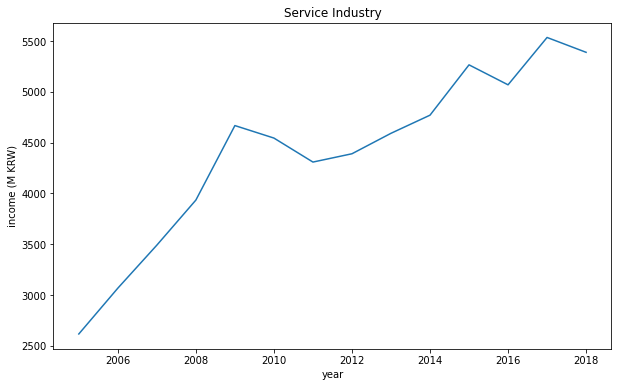

In [32]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 4].groupby('year').mean()['income'].plot()
plt.title('Service Industry')
plt.ylabel('income (M KRW)')
plt.show()

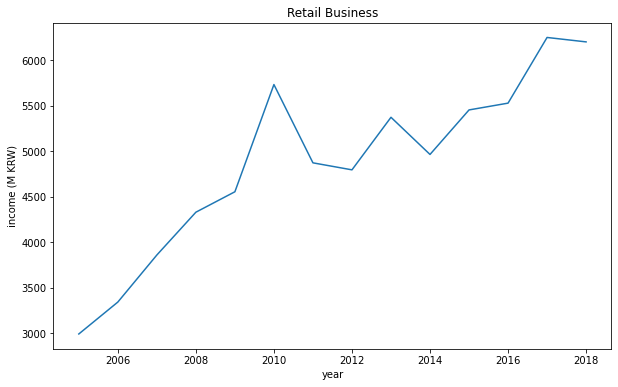

In [33]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 5].groupby('year').mean()['income'].plot()
plt.title('Retail Business')
plt.ylabel('income (M KRW)')
plt.show()

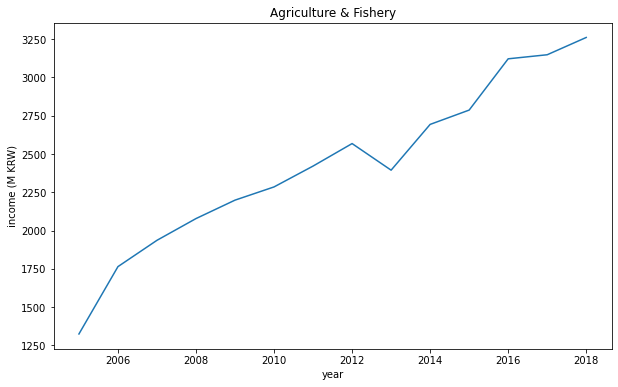

In [34]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 6].groupby('year').mean()['income'].plot()
plt.title('Agriculture & Fishery')
plt.ylabel('income (M KRW)')
plt.show()

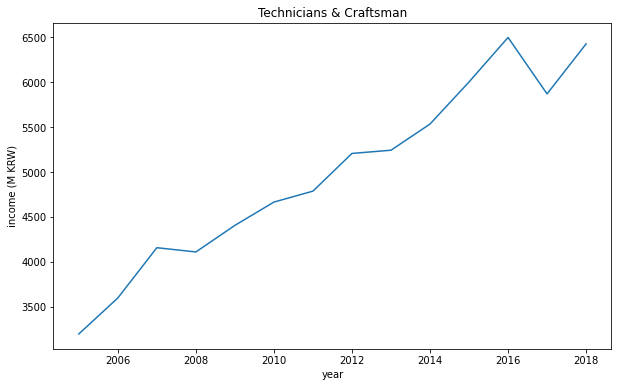

In [35]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 7].groupby('year').mean()['income'].plot()
plt.title('Technicians & Craftsman')
plt.ylabel('income (M KRW)')
plt.show()

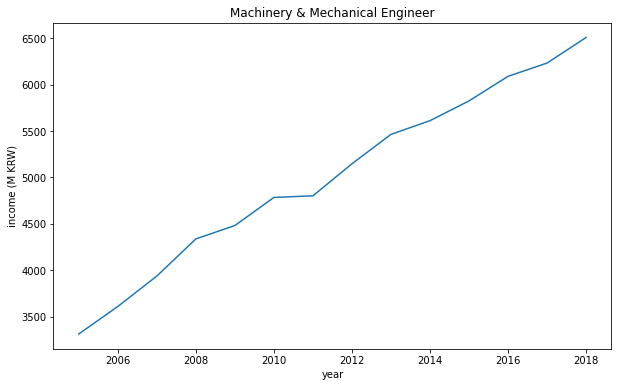

In [36]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 8].groupby('year').mean()['income'].plot()
plt.title('Machinery & Mechanical Engineer')
plt.ylabel('income (M KRW)')
plt.show()

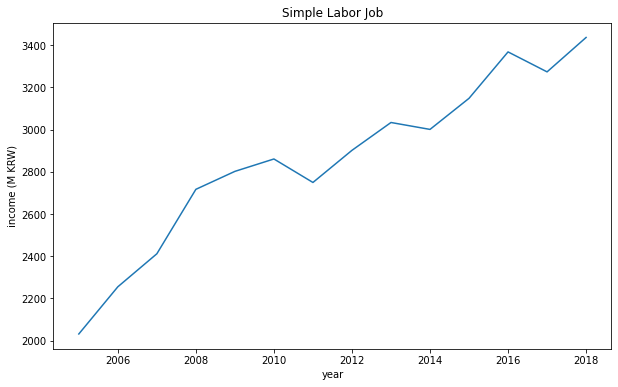

In [37]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 9].groupby('year').mean()['income'].plot()
plt.title('Simple Labor Job')
plt.ylabel('income (M KRW)')
plt.show()

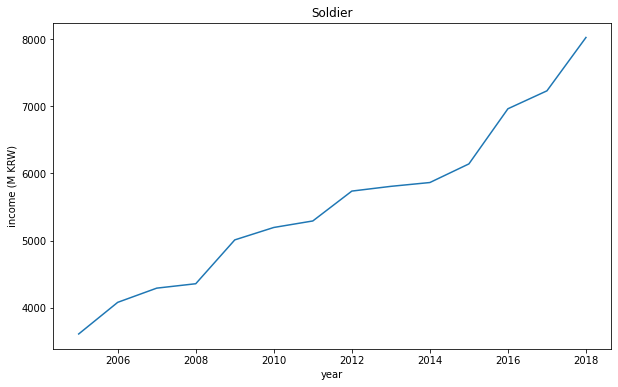

In [38]:
plt.figure(figsize=(10, 6))
clean_df[clean_df['job'] == 10].groupby('year').mean()['income'].plot()
plt.title('Soldier')
plt.ylabel('income (M KRW)')
plt.show()

In [39]:
# 과거의 데이터는 최근과 소득 수치에서 차이가 있을 것으로 생각해 최근 2년의 조사 데이터만을 사용하기 위해 사용할 data 정의.
data = income_df[income_df['wave']>=13]
data

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
7,10101,2017,13,1,851.0,1,2,1936,2,2,2,,,10,0
20,20101,2017,13,1,1474.0,1,2,1945,4,2,1,,,10,0
21,20101,2018,14,1,2330.0,1,2,1945,4,2,1,,,10,0
34,30101,2017,13,1,698.0,1,1,1948,3,2,2,,,10,0
35,30101,2018,14,1,815.0,1,1,1948,3,2,2,,,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,97980701,2017,13,6,2981.0,2,1,1956,5,1,1,854,3,,8
92841,97980701,2018,14,6,4118.0,2,1,1956,5,1,1,854,3,,8
92848,97990701,2017,13,6,1446.3,1,2,1933,2,2,2,,,10,0
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,,8


In [40]:
data.corr()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
id,1.000000,0.000418,0.000418,0.332729,-0.113496,-0.132956,0.078616,-0.115769,-0.166036,0.024071,0.006045
year,0.000418,1.000000,1.000000,-0.004252,0.011315,-0.011144,0.005058,0.018968,0.008892,0.009796,-0.011208
wave,0.000418,1.000000,1.000000,-0.004252,0.011315,-0.011144,0.005058,0.018968,0.008892,0.009796,-0.011208
region,0.332729,-0.004252,-0.004252,1.000000,-0.095924,-0.055899,0.029273,-0.097058,-0.140958,-0.039957,0.072135
income,-0.113496,0.011315,0.011315,-0.095924,1.000000,0.488655,-0.316928,0.380293,0.425163,-0.222479,0.037172
family_member,-0.132956,-0.011144,-0.011144,-0.055899,0.488655,1.000000,-0.513890,0.458189,0.446332,-0.477220,0.083082
gender,0.078616,0.005058,0.005058,0.029273,-0.316928,-0.513890,1.000000,-0.295076,-0.436363,0.392166,-0.149624
year_born,-0.115769,0.018968,0.018968,-0.097058,0.380293,0.458189,-0.295076,1.000000,0.657203,0.163243,0.185004
education_level,-0.166036,0.008892,0.008892,-0.140958,0.425163,0.446332,-0.436363,0.657203,1.000000,-0.033881,0.063898
marriage,0.024071,0.009796,0.009796,-0.039957,-0.222479,-0.477220,0.392166,0.163243,-0.033881,1.000000,0.048451


우선 여기서 income에 대한 상관계수가 총 14년의 데이터와 최근 2년 데이터 사이에 차이가 있다. income과 gender 사이의 상관계수가 최근 2년 데이터에서 0.038만큼 더 차이가 발생했고, income과 education_level 사이의 상관계수도 최근 2년 데이터에서 0.021 더 커졌다. 과거와 현재의 income과 가족 구성원, 학력 등에 대한 비교도 흥미로운 결과가 나올 것 같다.

In [41]:
data.describe()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
count,1.280500e+04,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000
mean,4.876007e+07,2017.494416,13.494416,3.797657,4217.633819,2.291371,1.340492,1955.246701,4.576650,1.755408,1.526904
std,2.829868e+07,0.499988,0.499988,2.056161,4891.569867,1.242846,0.473893,16.315323,1.672826,1.124336,0.499295
min,1.010100e+04,2017.000000,13.000000,1.000000,-232174.000000,1.000000,1.000000,1919.000000,2.000000,1.000000,1.000000
25%,2.483010e+07,2017.000000,13.000000,2.000000,1403.000000,1.000000,1.000000,1941.000000,3.000000,1.000000,1.000000
50%,4.808010e+07,2017.000000,13.000000,3.000000,2970.000000,2.000000,1.000000,1953.000000,5.000000,1.000000,2.000000
75%,6.876100e+07,2018.000000,14.000000,6.000000,5923.000000,3.000000,2.000000,1968.000000,6.000000,2.000000,2.000000
max,9.800070e+07,2018.000000,14.000000,7.000000,170204.000000,9.000000,2.000000,1999.000000,9.000000,6.000000,2.000000


### 가설 1. 학력과 연 소득에는 양의 상관관계가 있을 것이다.

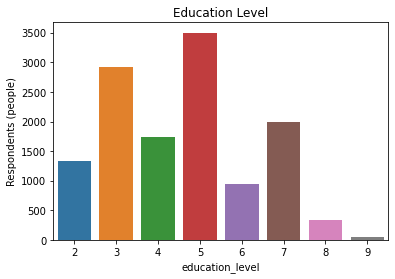

In [42]:
# 각 education_level 별 사람 수
sns.countplot(x='education_level', data=data)
plt.ylabel('Respondents (people)')
plt.title('Education Level')
plt.show()

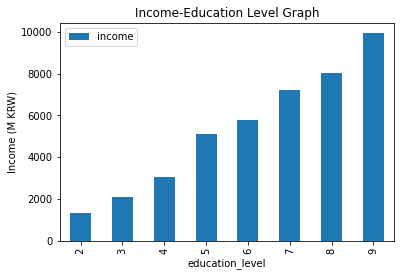

In [43]:
data[['education_level', 'income']].groupby(['education_level']).mean().plot(kind='bar')
plt.ylabel('Income (M KRW)')
plt.title('Income-Education Level Graph')

plt.show()

education_level: 1) no education(under 7 yrs-old) 2) no education(7 & over 7 yrs-old) 3) elementary 4) middle school 5) high school 6) college 7) university degree 8) MA 9) doctoral degree

역시 교육 정도가 높아질수록 평균 연 소득은 증가하는 것을 알 수 있다.

그렇다면 나이대 별 교육 정도는 어떤 분포를 가질지도 궁금하다.

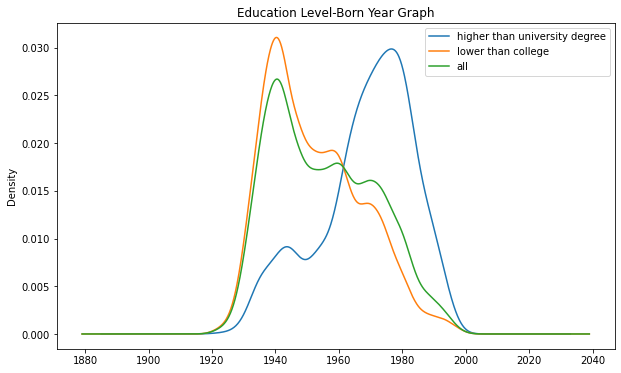

In [44]:
plt.figure(figsize=(10, 6))
data['year_born'][data['education_level']>6].plot(kind='kde')
data['year_born'][data['education_level']<=6].plot(kind='kde')
data['year_born'].plot(kind='kde')
plt.legend(['higher than university degree', 'lower than college', 'all'])
plt.title('Education Level-Born Year Graph')

plt.show()

일반적으로 학벌의 기준이 되는 대졸을 기준으로 대졸 미만과 대졸 이상인 응답자의 출생년도에 따른 분포를 그려봤는데 대졸 이상인 사람들은 1970-1990년대 사람들이 많았고 대졸 미만인 사람들은 1940년대에 많이 분포하는 것을 볼 수 있다.  
그렇다면 나이대별 연 소득은 어떤 분포를 가질까?

### 가설 2. 나이대와 소득에도 상관관계가 있을 것이다.
추측하기로는 위의 결과로 보아 학력이 높은 사람들이 소득이 높으므로 높은 학력이 많은 나이대인 1980년대에서 소득이 높을 것이다.

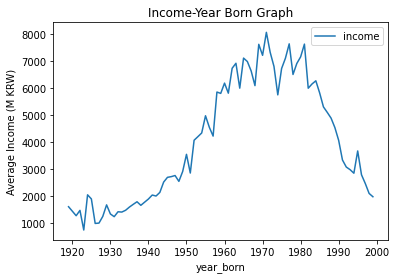

In [45]:
# 나이대 별 평균 소득 그래프
data[['income', 'year_born']].groupby('year_born').mean().plot()
plt.title('Income-Year Born Graph')
plt.ylabel('Average Income (M KRW)')
plt.show()

역시 학력이 높은 사람들이 많이 분포하는 1980년대생 근처에서 소득이 상당히 높은 것을 알 수 있다.

### 가설 3. 지역과 소득에는 상관관계가 있을 것이다. 특히 수도권에서 높은 소득을 보일 것 같다.
region: 1) Seoul 2) Kyeong-gi 3) Kyoung-nam 4) Kyoung-buk 5) Chung-nam 6) Gang-won &. Chung-buk 7) Jeolla & Jeju

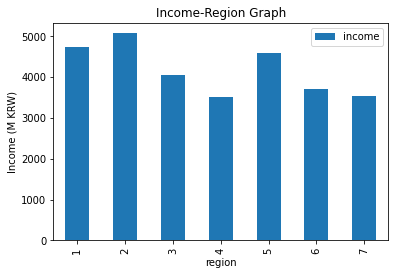

In [46]:
# 지역 별 연 소득 평균 그래프
data[['income', 'region']].groupby('region').mean().plot(kind='bar')
plt.ylabel('Income (M KRW)')
plt.title('Income-Region Graph')
plt.show()

예상한 대로 1(서울)과 2(경기)지역에서 소득이 높게 나온 것을 확인할 수 있다. 그 뒤로는 5(충남)지역의 평균 소득이 높은데 이는 충남에 삼성전자가 있기때문이 아닐까싶다.

### 번외편

그 외에도 처음에 확인한 상관계수표에서 가족 구성원과 소득에 상관관계가 있어 보여서 확인해보겠다.

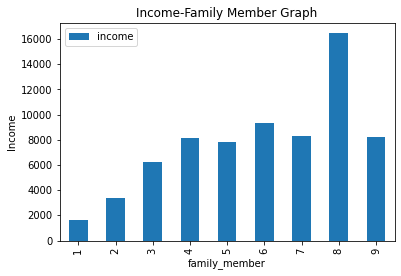

In [47]:
data[['income', 'family_member']].groupby('family_member').mean().plot(kind='bar')
plt.title('Income-Family Member Graph')
plt.ylabel('Income')
plt.show()

가족 구성원이 8명인 경우 유난히 평균 소득이 높다. 이상하므로 데이터를 확인해보자.

In [48]:
data[data['family_member']==8]

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
4357,4100101,2017,13,2,12792.0,8,1,1954,5,1,2,922,3,,9
4358,4100101,2018,14,2,20106.0,8,1,1954,5,1,1,922,1,,9


가족 구성원이 8명인 사람이 2 명이 있었는데 둘 다 연 소득이 전체 평균보다 훨씬 높은 1억원을 넘어가기 때문에 이렇게 특이한 그래프가 나왔다. 따라서 맨 처음에 확인한 상관관계표에서 가족구성원과 연 소득에서 상관계수가 큰 편이었던 것은 의미있는 수치는 아니었던 것 같다.

추가적으로 학력별로 성별에 따른 소득 차이도 있는 지 궁금해서 확인해보겠다. (그냥 흥미로운 Dataset을 구경하는 김에 정말로 순수한 궁금증으로..)

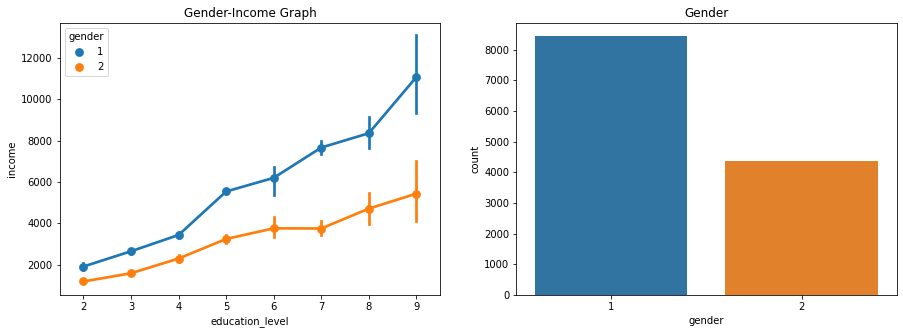

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#sns.catplot(x='education_level', y='income',hue='gender', kind='point', data=data, ax=ax[0])
sns.pointplot(x='education_level', y='income',hue='gender', data=data, ax=ax[0])
ax[0].set_title('Gender-Income Graph')

sns.countplot(x=data['gender'], ax=ax[1])
ax[1].set_title('Gender')

plt.show()

gender: 1) male 2) female  
우선 이 데이터에 속해있는 사람들이 남성의 비율이 훨씬 크므로 여성의 데이터가 남성의 데이터에 비해 부정확하는 등 비교하기에 적절하지 않을 수 있다. 커멘트는 조심스러운 부분이므로 조심스럽게 그래프만 확인하고 넘어가는걸로..

마지막으로 궁금하니까 하나만 더  
결혼 여부와 소득의 관계까지만 더 확인해보자.

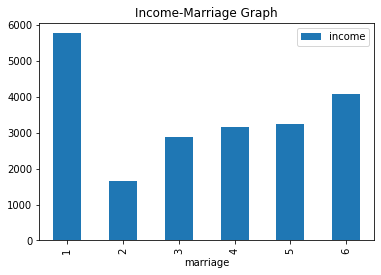

In [50]:
data[['marriage', 'income']].groupby('marriage').mean().plot(kind='bar')
plt.title('Income-Marriage Graph')
plt.show()

marriage: marital status. 1) not applicable (under 18) 2) married 3) separated by death 4) separated 5) not married yet 6) others  
결혼 여부는 1번이 결측치인것으로 보인다. Kaggle 페이지에서 설명란에 marriage column에 대한 설명으로 1번은 not applicable(under 18)이라고 되어있는데 나이가 어려 결혼 여부에 해당사항이 없는 사람들을 포함해 응답 거부한 사람들까지 포함되어있는 것으로 보인다. 이상하니까 marriage == 1 에 해당하는 데이터를 확인해보자.

In [51]:
data[data['marriage']==1]

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job
63,60101,2017,13,1,4668.0,5,1,1962,6,1,1,530,1,,5
64,60101,2018,14,1,5008.0,5,1,1962,6,1,1,855,3,,8
121,120101,2017,13,1,1228.0,2,1,1940,4,1,2,,,10,0
122,120101,2018,14,1,1590.0,2,1,1940,4,1,2,,,10,0
152,150101,2017,13,1,6189.0,4,1,1978,7,1,2,312,3,,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92825,97960701,2018,14,6,1948.0,2,1,1933,3,1,2,,,1,0
92840,97980701,2017,13,6,2981.0,2,1,1956,5,1,1,854,3,,8
92841,97980701,2018,14,6,4118.0,2,1,1956,5,1,1,854,3,,8
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,,8


In [52]:
data[data['marriage']==1].describe()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
count,7.238000e+03,7238.000000,7238.000000,7238.000000,7238.000000,7238.00000,7238.000000,7238.000000,7238.000000,7238.0,7238.000000
mean,4.683730e+07,2017.491296,13.491296,3.757253,5765.222361,2.99323,1.038685,1958.400525,5.118403,1.0,1.552639
std,2.796267e+07,0.499959,0.499959,2.046728,5800.895876,1.08456,0.192856,15.312352,1.544581,0.0,0.497256
min,6.010100e+04,2017.000000,13.000000,1.000000,-232174.000000,1.00000,1.000000,1919.000000,2.000000,1.0,1.000000
25%,2.356015e+07,2017.000000,13.000000,2.000000,2566.250000,2.00000,1.000000,1945.000000,4.000000,1.0,1.000000
50%,4.558010e+07,2017.000000,13.000000,3.000000,5018.000000,3.00000,1.000000,1959.000000,5.000000,1.0,2.000000
75%,6.619010e+07,2018.000000,14.000000,6.000000,7706.750000,4.00000,1.000000,1971.000000,7.000000,1.0,2.000000
max,9.800070e+07,2018.000000,14.000000,7.000000,170204.000000,9.00000,2.000000,1996.000000,9.000000,1.0,2.000000


위 표를 보면 나이대도 1919년생부터 1996년생까지 다양하고 해당하는 사람 수도 7238명이나 되는 것으로 보아 marriage column은 데이터로서 활용하기에는 무리가 있어보인다.  
그럼에도 불구하고 `Income-Marriage Graph` 에서 값 1을 제외하고 보면 2(married)보다 5(not married)가 평균 소득이 높으니까 결혼 안해야지..